In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
# Checks and setup
import tensorflow as tf
import os

print(tf.__version__)

2.1.0


## Eager execution

Since eager execution is enabled by default in TensorFlow 2.0 you _do not_ need to do anything to enable it. However, you can disable it by executing the following:

```python
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
```

If you want to know whether eager execution is enabled or not just execute `tf.executing_eagerly()`. 

## GradientTape

## Part I

In [4]:
a = tf.Variable(tf.random.normal(shape=(2, 2)))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  c=tf.sqrt(tf.square(a)+tf.square(b))
  dc_da=tape.gradient(c,a)
  print(dc_da)

tf.Tensor(
[[-0.9672372  -0.54761136]
 [-0.7472766   0.70843863]], shape=(2, 2), dtype=float32)


## Part II

In [5]:
# Imports
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
# Generate some data
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  random_state=666)

X.shape, y.shape

((100, 2), (100,))

In [7]:
X[:10], y[:10]

(array([[2.34769665, 3.84737956],
        [2.25211721, 7.72836548],
        [4.20334204, 8.19437057],
        [4.56840252, 5.00758839],
        [5.14209854, 8.60577994],
        [5.3476516 , 4.49482029],
        [0.77015549, 4.84023746],
        [3.93882207, 7.52922765],
        [4.41391444, 2.56506757],
        [3.40315224, 8.62298395]]), array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0]))

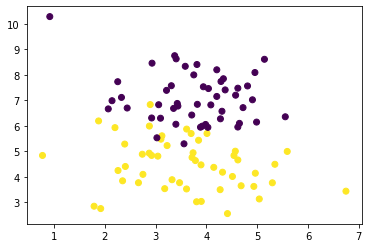

In [8]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y.reshape((100,1))[:, 0])
plt.show()

In [0]:
# Define a model to fit the above data
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [0]:
# Define loss and optimizer
loss_func = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
@tf.function
def train_loop(features, labels):
    # Define the GradientTape context
    # Get the probabilities
    # Calculate the loss
    # Get the gradients
    # Update the weights
    with tf.GradientTape() as tape:
      predictions=model(features)
      loss=loss_func(labels,predictions)
      gradients=tape.gradient(loss,model.trainable_variables)
      optimizer.apply_gradients(zip(gradients,model.trainable_variables))
    return loss

In [0]:
# Shuffle the data
indices = np.random.permutation(len(X))
features = X[indices]
labels = y[indices]

# Create batches of data
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(16)

In [0]:
# Train the model
def train_model():
    start = time.time()
    for epoch in range(10):
        for step, (x, y) in enumerate(dataset):
            loss = train_loop(x, y)
            print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))
    print("It took {} seconds".format(time.time() - start))

In [14]:
train_model()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 0: last batch loss = 0.9032
Epoch 0: last batch loss = 0.6799
Epoch 0: last batch loss = 0.7728
Epoch 0: last batch loss = 0.8082
Epoch 0: last batch loss = 0.7011
Epoch 0: last batch loss = 0.6352
Epoch 0: last batch loss = 0.7035
Epoch 1: last batch loss = 0.6918
Epoch 1: last batch loss = 0.6334
Epoch 1: last batch loss = 0.7244
Epoch 1: last batch loss = 0.6614
Epoch 1: last batch loss = 0.7333
Epoch 1: last batch loss = 0.6099
Epoch 1: last batch loss = 0.6776
Epoch 2: last batch loss = 0.708